# Lesson: 1_sMRI Modalities

## Objectives
- Visualize structural MR images (NifTi)

## Python Requirements
- [matplotlib](https://matplotlib.org/)
- [nibabel](https://nipy.org/nibabel/)
- [nilearn](https://nilearn.github.io/index.html)

## T1 and T2 relaxation and image contrast

### T1 
The longitudinal (or spin-lattice) relaxation time) is the decay constant for the recovery of the z component of the nuclear spin magnetization, Mz, towards its thermal equilibrium value, Mz_eq.  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

def get_Mz(T1, t, M_eq=1):
    Mz = M_eq * (1 - np.exp(-t/T1)) 
    return Mz

def get_Mxy(T2, t, Mxy_0=1):
    Mxy = Mxy_0 * np.exp(-t/T2)
    return Mxy


In [34]:
# params
T1_dict = {'GM':1200, 'WM':800, 'CSF':4000, 'Bone':500}  
T2_dict = {'GM':110, 'WM':80, 'CSF':750, 'Bone':50}

T1_duration = np.arange(0,4500,500)
T2_duration = np.arange(0,500,100)

relax_df = pd.DataFrame()

# T1 signal
for tissue,T1 in T1_dict.items():
    _df = pd.DataFrame()
    Mz = get_Mz(T1,T1_duration)
    _df['time'] = T1_duration
    _df['signal'] = Mz
    _df['relaxation'] = 'T1'
    _df['tissue'] = tissue

    relax_df = relax_df.append(_df)

# T2 signal
for tissue,T2 in T2_dict.items():
    _df = pd.DataFrame()
    Mz = get_Mxy(T2,T2_duration)
    _df['time'] = T2_duration
    _df['signal'] = Mz
    _df['relaxation'] = 'T2'
    _df['tissue'] = tissue

    relax_df = relax_df.append(_df)


relax_df.head()

,time,signal,relaxation,tissue
0,0,0.000000,T1,GM
1,500,0.340759,T1,GM
2,1000,0.565402,T1,GM
3,1500,0.713495,T1,GM
4,2000,0.811124,T1,GM


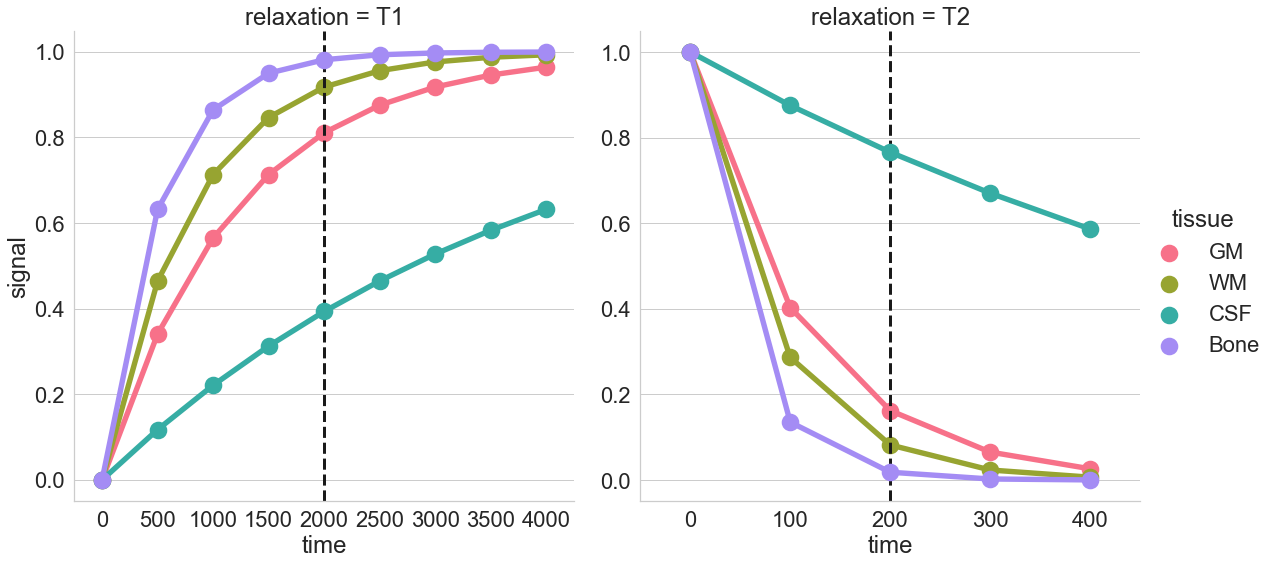

In [39]:
plot_df = relax_df.copy()
T1_TE = 4
T2_TE = 2

sns.set(font_scale = 2)
mpl.rcParams['lines.linewidth'] = 3
palette = sns.color_palette("husl", 4)
with sns.axes_style("whitegrid"):
    g = sns.catplot(y='signal',x='time', hue='tissue', col='relaxation', kind='point', data=plot_df, palette=palette, height=8, aspect=1, sharey=False, sharex=False)
    
    ax1, ax2 = g.axes[0]
    ax1.axvline(x=T1_TE, label='Echo Time', c='k', linestyle='--')
    ax2.axvline(x=T2_TE, label='Echo Time', c='k', linestyle='--')


## For neuroimaging studies, a good practice is to use Brain Imaging Data Structure (BIDS) to organize imaging dataset
- See this [paper](https://www.nature.com/articles/sdata201644) and [starter-kit](https://github.com/bids-standard/bids-starter-kit/wiki) for more details
- See this [tutorial](https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI) for a BIDS carpentry lesson 
- Here is a typical directory structure for a sample dataset

<img src="../fig/episode_1/bids_structure.jpeg" width="600">

## For the sake of simplicity, in this tutorial we will use a pre-organized data from nilearn datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting

## Select dataset 
- [Smily dataset](https://openneuro.org/datasets/ds002711/versions/1.1.0) (High-dim)
    - Emojis influence autobiographical memory retrieval from reading words 
- [Craving dataset](https://openneuro.org/datasets/ds003242/versions/1.0.0) 
    - Cue Induced Craving task following food fasting, social isolation and baseline
- Add more in future

In [18]:
local_data_dir = '/home/nikhil/projects/SDC-BIDS-sMRI/local_data/1_sMRI_modalities/'

dataset = 'craving'

if dataset == 'smily':      
      T1_filename = local_data_dir + 'smily_sub-01_T1w.nii.gz'
      T2_filename = local_data_dir + 'smily_sub-01_T2w.nii.gz'

elif dataset == 'craving':
      T1_filename = local_data_dir + 'craving_sub-SAXSISO01b_T1w.nii.gz'
      T2_filename = local_data_dir +'craving_sub-SAXSISO01b_T2w.nii.gz'
      
else: 
      print('Unknown dataset: {}'.format(dataset))

print('Using {} dataset'.format(dataset))

Using craving dataset


### Read T1w and T2w anatomical images

In [19]:
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

print('T1 image path: {},\n\timage shape: {}'.format(T1_filename, T1_img.shape))
print('\tintensity value range: min: {}, max: {}'.format(np.min(T1_data.ravel()),np.max(T1_data.ravel())))
print('\nT2 image path: {},\n\timage shape: {}'.format(T2_filename, T2_img.shape))
print('\tintensity value range: min: {}, max: {}'.format(np.min(T2_data.ravel()),np.max(T2_data.ravel())))


T1 image path: /home/nikhil/projects/SDC-BIDS-sMRI/local_data/1_sMRI_modalities/craving_sub-SAXSISO01b_T1w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.0, max: 526.0000303946435

T2 image path: /home/nikhil/projects/SDC-BIDS-sMRI/local_data/1_sMRI_modalities/craving_sub-SAXSISO01b_T2w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.0, max: 325.9999999240972


### Visualize image
 - Single slice from three views: Coronal, Sagittal, Axial

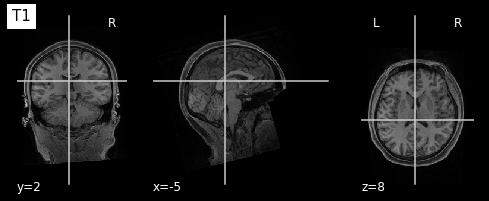

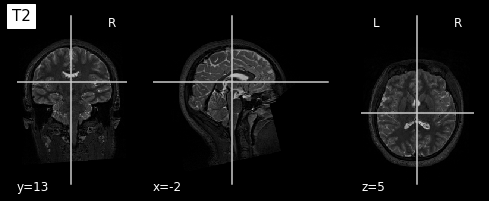

In [21]:

plotting.plot_anat(T1_filename, title="T1", vmax=500)
plotting.plot_anat(T2_filename, title="T2", vmax=300)


### Visualize image
 - Slice montage from three views: Coronal, Sagittal, Axial

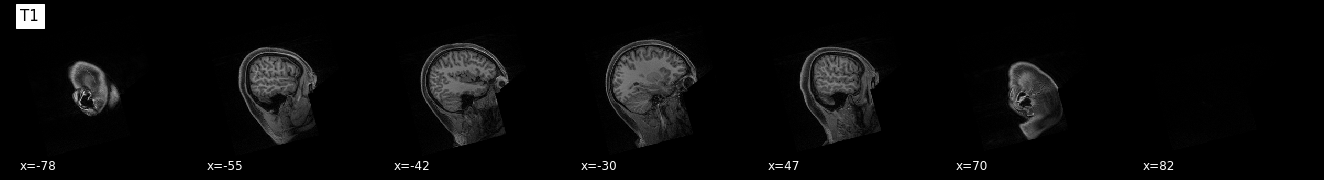

In [22]:
plotting.plot_anat(T1_filename, title="T1", display_mode='x', vmax=500)

### Visualize image
 - Interactive scroll of slices


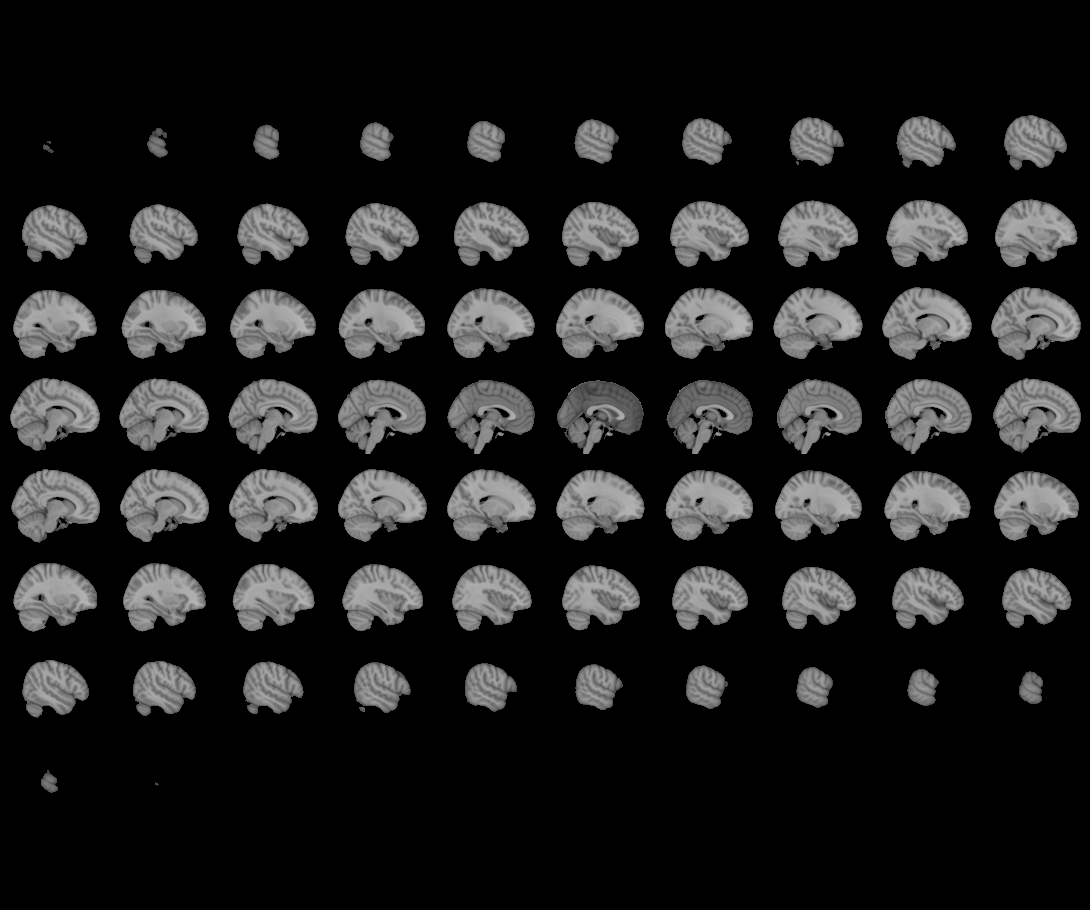
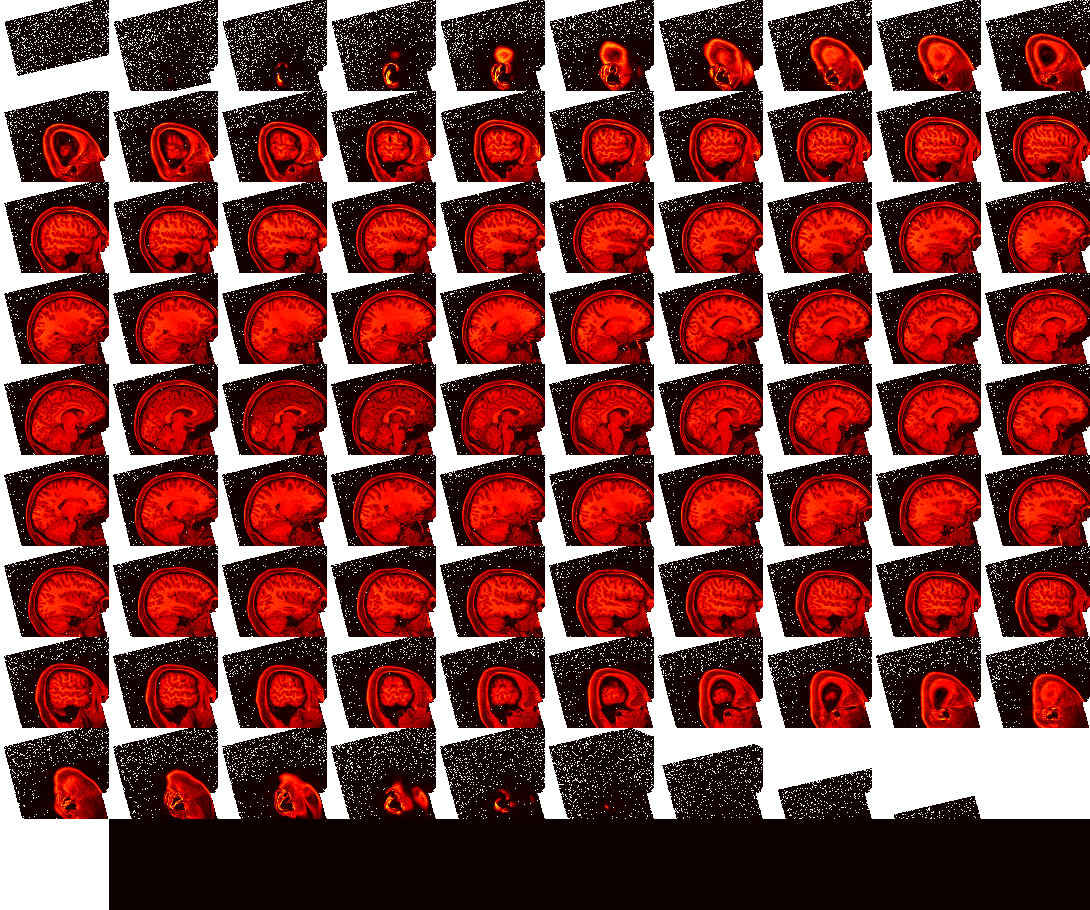

In [24]:
view = plotting.view_img(T1_filename, colorbar=True, vmax=500)
view

Note: we will discuss the x,y,z coordinate system in future lessons! 